In [1]:
import warnings
warnings.filterwarnings('ignore')

#core imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn import metrics
from sklearn.preprocessing import StandardScaler,MinMaxScaler

# regression models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Neural network
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

%matplotlib inline
plt.style.use('seaborn')

In [2]:
df= pd.read_csv("car data.csv")

In [3]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
df.shape

(301, 9)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [7]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [8]:
df.isna().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [9]:
df['Age'] = 2022 - df['Year']
df.drop('Year',axis=1,inplace = True)

In [10]:
df.columns

Index(['Car_Name', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Fuel_Type',
       'Seller_Type', 'Transmission', 'Owner', 'Age'],
      dtype='object')

In [11]:
cols_df = ['Fuel_Type','Seller_Type','Transmission','Owner']

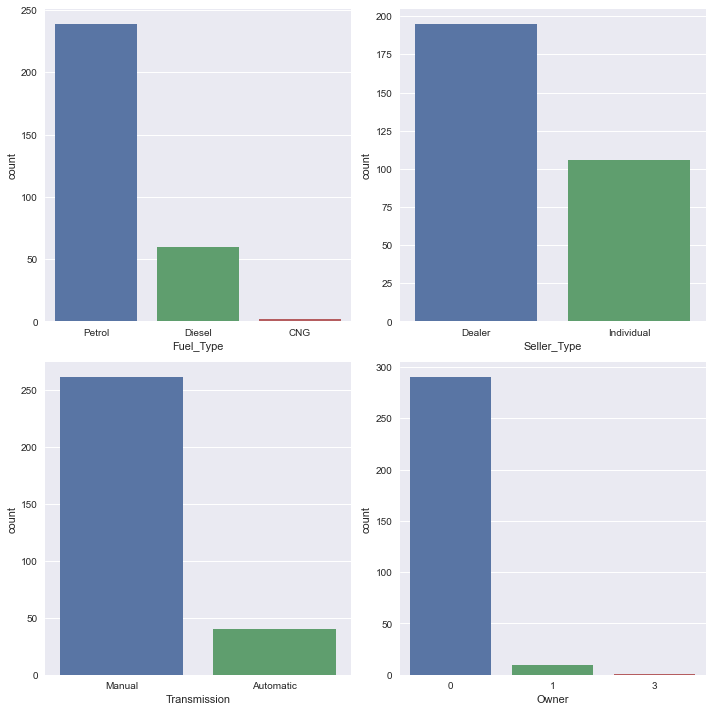

In [12]:
plt.figure(figsize=(10,10))
for i in range(len(cols_df)):
    plt.subplot(2,2,i+1)
    sns.countplot(x=cols_df[i], data=df)
    
plt.tight_layout()

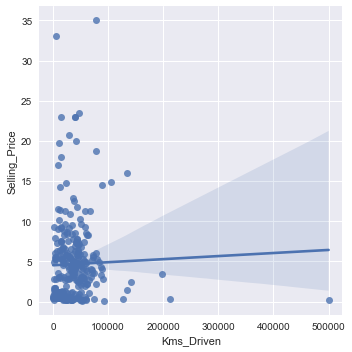

In [13]:
# 1- Kms_Driven
sns.lmplot(x='Kms_Driven',y='Selling_Price',data=df)

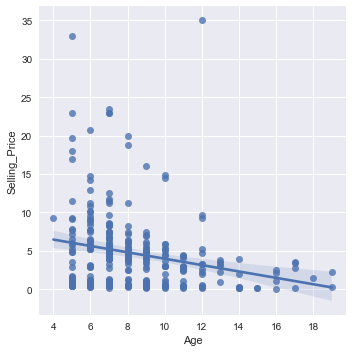

In [14]:
# 2- Age
sns.lmplot(x='Age',y='Selling_Price',data=df)

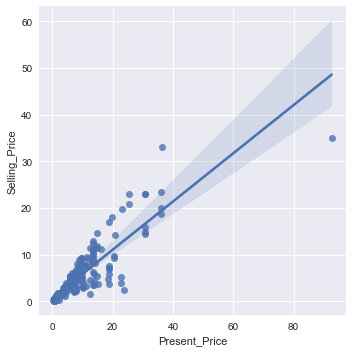

In [15]:
# 3- Present_Price
sns.lmplot(x='Present_Price',y='Selling_Price',data=df)

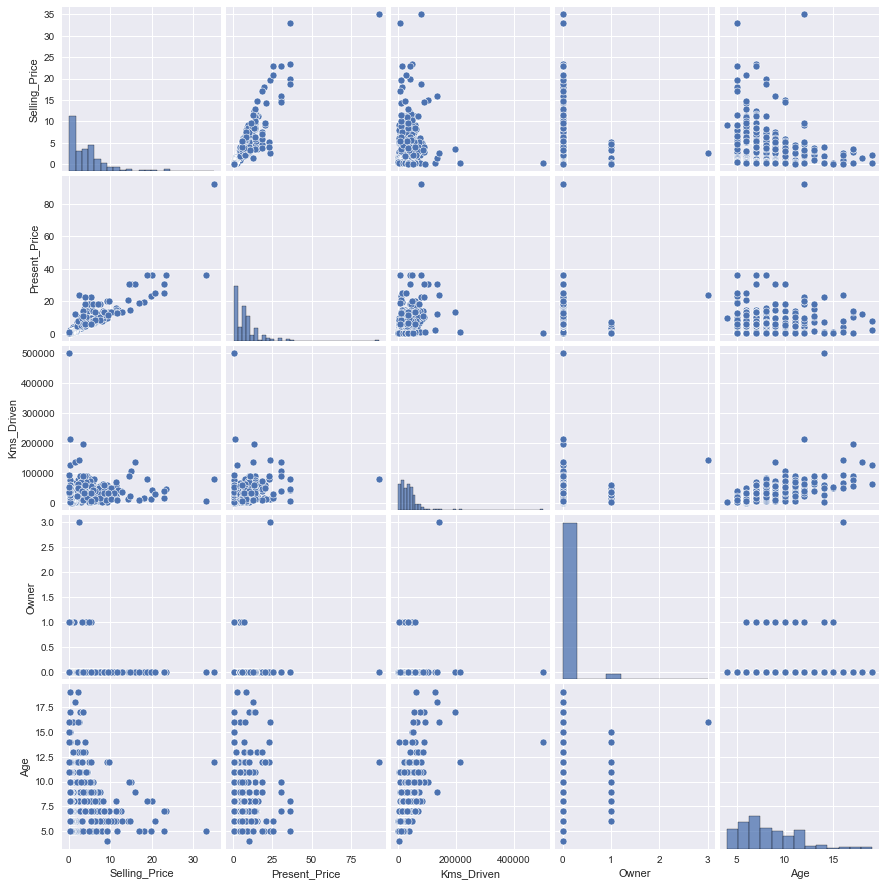

In [16]:
sns.pairplot(df)

<AxesSubplot:>

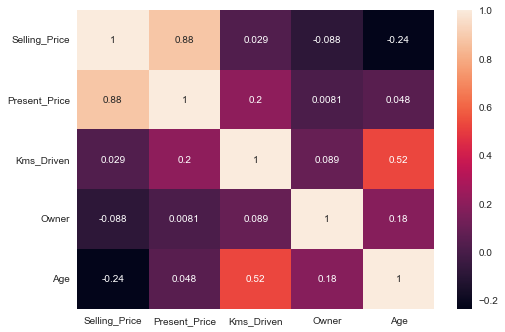

In [17]:
sns.heatmap(df.corr(),annot=True)

In [18]:
df

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,ritz,3.35,5.59,27000,Petrol,Dealer,Manual,0,8
1,sx4,4.75,9.54,43000,Diesel,Dealer,Manual,0,9
2,ciaz,7.25,9.85,6900,Petrol,Dealer,Manual,0,5
3,wagon r,2.85,4.15,5200,Petrol,Dealer,Manual,0,11
4,swift,4.60,6.87,42450,Diesel,Dealer,Manual,0,8
...,...,...,...,...,...,...,...,...,...
296,city,9.50,11.60,33988,Diesel,Dealer,Manual,0,6
297,brio,4.00,5.90,60000,Petrol,Dealer,Manual,0,7
298,city,3.35,11.00,87934,Petrol,Dealer,Manual,0,13
299,city,11.50,12.50,9000,Diesel,Dealer,Manual,0,5


In [19]:
df.drop(labels='Car_Name',axis= 1, inplace = True)

In [20]:
df = pd.get_dummies(df) 

In [21]:
df

,Selling_Price,Present_Price,Kms_Driven,Owner,Age,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Dealer,Seller_Type_Individual,Transmission_Automatic,Transmission_Manual
0,3.35,5.59,27000,0,8,0,0,1,1,0,0,1
1,4.75,9.54,43000,0,9,0,1,0,1,0,0,1
2,7.25,9.85,6900,0,5,0,0,1,1,0,0,1
3,2.85,4.15,5200,0,11,0,0,1,1,0,0,1
4,4.60,6.87,42450,0,8,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
296,9.50,11.60,33988,0,6,0,1,0,1,0,0,1
297,4.00,5.90,60000,0,7,0,0,1,1,0,0,1
298,3.35,11.00,87934,0,13,0,0,1,1,0,0,1
299,11.50,12.50,9000,0,5,0,1,0,1,0,0,1


<AxesSubplot:>

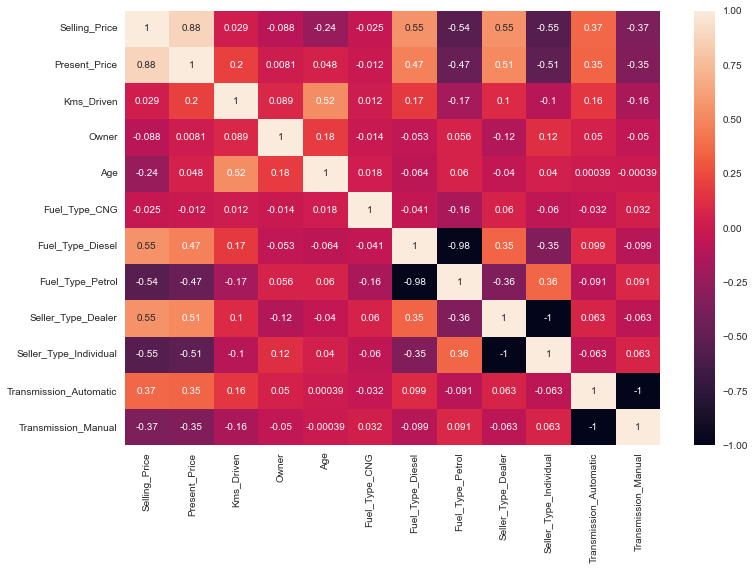

In [22]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True)

In [23]:
# Separating target variable and its features
y = df['Selling_Price']
X = df.drop('Selling_Price',axis=1)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
print("x train: ",X_train.shape)
print("x test: ",X_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)

x train:  (225, 11)
x test:  (76, 11)
y train:  (225,)
y test:  (76,)


In [25]:
scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [26]:
R2_train = []
R2_test = []
CV = []
MAE=[]
MSE=[]
RMSE=[]

def car_pred_model(model):
    
    # R2 score of train set
    y_pred_train = model.predict(X_train)
    R2_train_model = r2_score(y_train,y_pred_train)
    R2_train.append(round(R2_train_model,3))
    
    # R2 score of test set
    y_pred_test = model.predict(X_test)
    R2_test_model = r2_score(y_test,y_pred_test)
    R2_test.append(round(R2_test_model,3))
    
    # R2 mean of train set using Cross validation
    cross_val = cross_val_score(model ,X_train ,y_train ,cv=5)
    cv_mean = cross_val.mean()
    CV.append(round(cv_mean,3))
    
    # Printing results
    print("Train R2-score :",round(R2_train_model,3))
    print("Test R2-score :",round(R2_test_model,3))
    print("CV scores mean :",round(cv_mean,3))
    
    # Plotting Graphs 
    # Residual Plot of train data
    fig, ax = plt.subplots(1,2,figsize = (10,4))
    ax[0].set_title('Residual Plot of Train samples')
    sns.distplot((y_train-y_pred_train),hist = False,ax = ax[0])
    ax[0].set_xlabel('y_train - y_pred_train')
    
    # Y_test vs Y_train scatter plot
    ax[1].set_title('y_test vs y_pred_test')
    ax[1].scatter(x = y_test, y = y_pred_test)
    ax[1].set_xlabel('y_test')
    ax[1].set_ylabel('y_pred_test')
    plt.show()
    
    predictions=model.predict(X_test)
    plt.scatter(y_test,predictions)
    plt.plot(y_test,y_test,'r')
    plt.show()
    
     # Regression evaluation metrics
    MAE_model = metrics.mean_absolute_error(y_test, y_pred_test)
    MSE_model = metrics.mean_squared_error(y_test, y_pred_test)
    RMSE_model = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))
    MAE.append(round(MAE_model,3))
    MSE.append(round(MSE_model,3))
    RMSE.append(round(RMSE_model,3))
    
    print('MAE:', round(MAE_model,3))
    print('MSE:', round(MSE_model,3))
    print('RMSE:', round(RMSE_model,3))

Train R2-score : 0.883
Test R2-score : 0.877
CV scores mean : 0.797


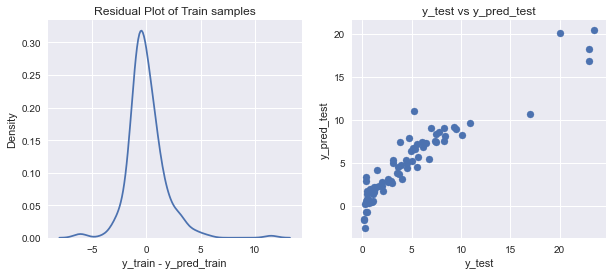

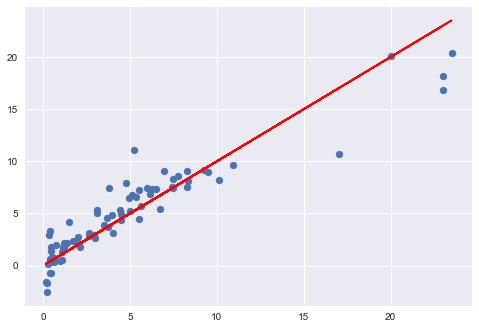

MAE: 1.228
MSE: 3.379
RMSE: 1.838


In [27]:
lr = LinearRegression()
lr.fit(X_train,y_train)
car_pred_model(lr)

Train R2-score : 0.882
Test R2-score : 0.873
CV scores mean : 0.815


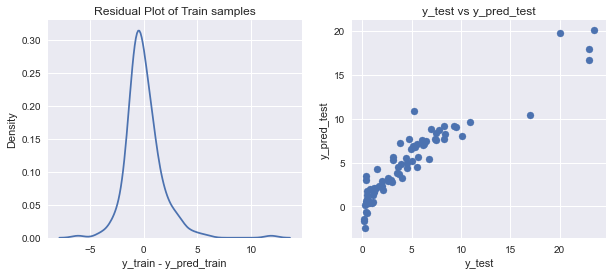

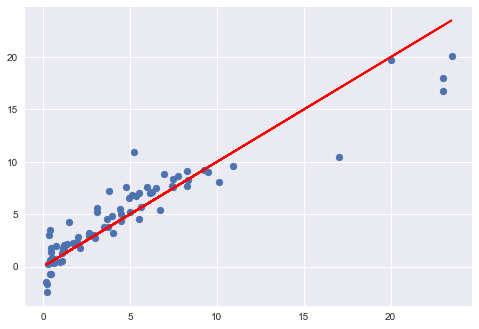

MAE: 1.244
MSE: 3.49
RMSE: 1.868


In [28]:
rg = Ridge()
# range of alpha 
alpha = np.logspace(-3,3,num=14)

# Creating RandomizedSearchCV to find the best estimator of hyperparameter
rg_rs = RandomizedSearchCV(estimator = rg, param_distributions = dict(alpha=alpha))
rg_rs.fit(X_train,y_train)

car_pred_model(rg_rs)

Train R2-score : 0.881
Test R2-score : 0.874
CV scores mean : 0.804


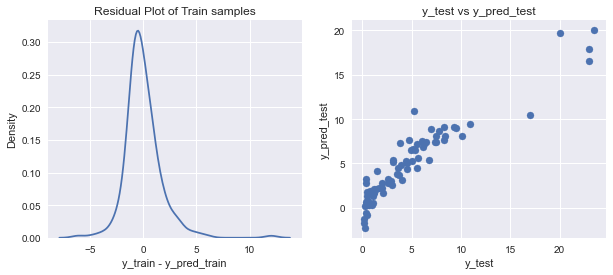

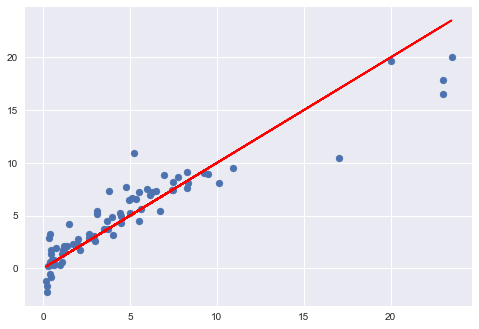

MAE: 1.234
MSE: 3.452
RMSE: 1.858


In [29]:
ls = Lasso()
alpha = np.logspace(-3,3,num=14) # range for alpha

ls_rs = RandomizedSearchCV(estimator = ls, param_distributions = dict(alpha=alpha))
ls_rs.fit(X_train,y_train)

car_pred_model(ls_rs)

Train R2-score : 0.982
Test R2-score : 0.966
CV scores mean : 0.858


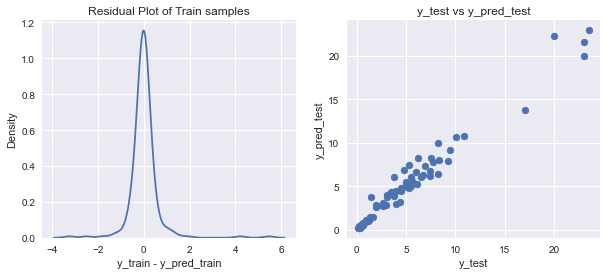

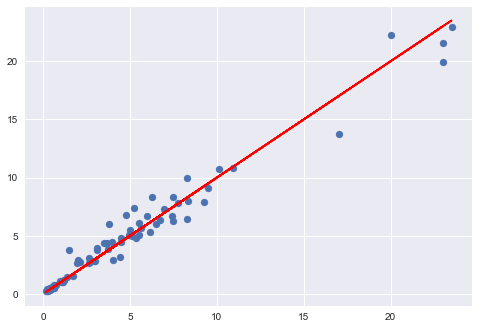

MAE: 0.616
MSE: 0.947
RMSE: 0.973


In [30]:
rf = RandomForestRegressor(max_depth=8,n_estimators=100)

rf.fit(X_train,y_train)

car_pred_model(rf)

Train R2-score : 1.0
Test R2-score : 0.973
CV scores mean : 0.863


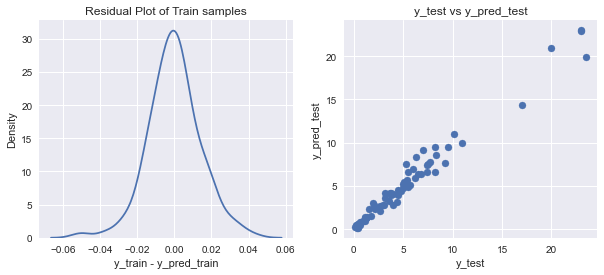

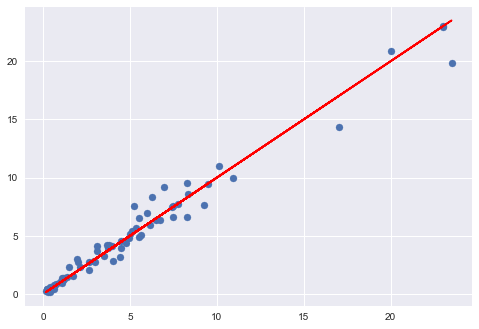

MAE: 0.524
MSE: 0.74
RMSE: 0.86


In [31]:
gb= GradientBoostingRegressor(learning_rate = 0.2, n_estimators=500)

gb.fit(X_train,y_train)

car_pred_model(gb)

In [32]:
Technique = ["LinearRegression","Ridge","Lasso","RandomForestRegressor","GradientBoostingRegressor"]
results=pd.DataFrame({'Model': Technique,'R2_Squared_Train': R2_train,'R2_Squared_Test': R2_test,'CV_score_mean': CV
                      , 'MAE':MAE, 'MSE':MSE, 'RMSE':RMSE})
results.sort_values(ascending= False , by = ['R2_Squared_Test'])

,Model,R2_Squared_Train,R2_Squared_Test,CV_score_mean,MAE,MSE,RMSE
4,GradientBoostingRegressor,1.000,0.973,0.863,0.524,0.740,0.860
3,RandomForestRegressor,0.982,0.966,0.858,0.616,0.947,0.973
0,LinearRegression,0.883,0.877,0.797,1.228,3.379,1.838
2,Lasso,0.881,0.874,0.804,1.234,3.452,1.858
1,Ridge,0.882,0.873,0.815,1.244,3.490,1.868


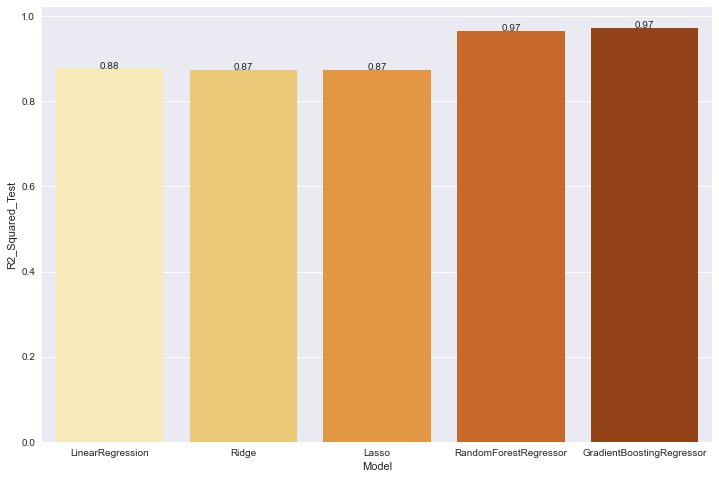

In [33]:
def show_values_on_bars(axs):
    def _show_on_single_plot(ax):
        for p in ax.patches:
            _x = p.get_x() + p.get_width() / 2
            _y = p.get_y() + p.get_height()
            value = '{:.2f}'.format(p.get_height())
            ax.text(_x, _y, value, ha="center")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)


plt.figure(figsize=(12, 8))
ax = sns.barplot(x="Model", y="R2_Squared_Test", data= results, palette="YlOrBr")
show_values_on_bars(ax)

In [34]:
from tensorflow.keras.layers import Dropout

model=Sequential()

model.add(Dense(512,activation='relu',input_shape=(X_train.shape[1],)))
model.add(Dense(64,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(1))

In [35]:
model.compile(optimizer='Adam',loss='mse',metrics=['mae'])

In [38]:
model.fit(x=X_train,y=y_train,validation_data=(X_test,y_test),batch_size=128,epochs=400)

Epoch 1/400
2/2 [==============================] - 0s 68ms/step - loss: 0.3323 - mae: 0.3886 - val_loss: 0.8669 - val_mae: 0.6011
Epoch 2/400
2/2 [==============================] - 0s 31ms/step - loss: 0.3046 - mae: 0.3838 - val_loss: 0.9707 - val_mae: 0.6332
Epoch 3/400
2/2 [==============================] - 0s 28ms/step - loss: 0.3166 - mae: 0.3822 - val_loss: 0.8532 - val_mae: 0.6031
Epoch 4/400
2/2 [==============================] - 0s 30ms/step - loss: 0.3225 - mae: 0.3858 - val_loss: 0.8754 - val_mae: 0.5951
Epoch 5/400
2/2 [==============================] - 0s 30ms/step - loss: 0.3018 - mae: 0.3651 - val_loss: 0.9121 - val_mae: 0.6236
Epoch 6/400
2/2 [==============================] - 0s 29ms/step - loss: 0.3174 - mae: 0.3959 - val_loss: 0.8456 - val_mae: 0.5866
Epoch 7/400
2/2 [==============================] - 0s 29ms/step - loss: 0.3182 - mae: 0.3840 - val_loss: 0.8333 - val_mae: 0.5802
Epoch 8/400
2/2 [==============================] - 0s 31ms/step - loss: 0.3014 - mae: 0.37

2/2 [==============================] - 0s 30ms/step - loss: 0.2831 - mae: 0.3567 - val_loss: 0.7879 - val_mae: 0.5656
Epoch 64/400
2/2 [==============================] - 0s 29ms/step - loss: 0.3050 - mae: 0.3655 - val_loss: 0.7708 - val_mae: 0.5567
Epoch 65/400
2/2 [==============================] - 0s 28ms/step - loss: 0.2879 - mae: 0.3619 - val_loss: 0.7654 - val_mae: 0.5588
Epoch 66/400
2/2 [==============================] - 0s 30ms/step - loss: 0.2873 - mae: 0.3689 - val_loss: 0.8173 - val_mae: 0.5896
Epoch 67/400
2/2 [==============================] - 0s 29ms/step - loss: 0.2824 - mae: 0.3684 - val_loss: 0.8504 - val_mae: 0.5851
Epoch 68/400
2/2 [==============================] - 0s 27ms/step - loss: 0.2905 - mae: 0.3612 - val_loss: 0.8422 - val_mae: 0.5927
Epoch 69/400
2/2 [==============================] - 0s 28ms/step - loss: 0.2858 - mae: 0.3567 - val_loss: 0.8346 - val_mae: 0.5876
Epoch 70/400
2/2 [==============================] - 0s 27ms/step - loss: 0.2858 - mae: 0.3695 - 

2/2 [==============================] - 0s 28ms/step - loss: 0.2685 - mae: 0.3459 - val_loss: 0.8796 - val_mae: 0.6057
Epoch 126/400
2/2 [==============================] - 0s 28ms/step - loss: 0.2762 - mae: 0.3566 - val_loss: 0.7535 - val_mae: 0.5533
Epoch 127/400
2/2 [==============================] - 0s 28ms/step - loss: 0.2653 - mae: 0.3471 - val_loss: 0.7445 - val_mae: 0.5492
Epoch 128/400
2/2 [==============================] - 0s 27ms/step - loss: 0.2682 - mae: 0.3466 - val_loss: 0.8085 - val_mae: 0.5693
Epoch 129/400
2/2 [==============================] - 0s 28ms/step - loss: 0.2617 - mae: 0.3405 - val_loss: 0.7824 - val_mae: 0.5592
Epoch 130/400
2/2 [==============================] - 0s 29ms/step - loss: 0.2662 - mae: 0.3422 - val_loss: 0.7938 - val_mae: 0.5608
Epoch 131/400
2/2 [==============================] - 0s 27ms/step - loss: 0.2604 - mae: 0.3411 - val_loss: 0.7953 - val_mae: 0.5741
Epoch 132/400
2/2 [==============================] - 0s 27ms/step - loss: 0.2642 - mae: 0.

2/2 [==============================] - 0s 28ms/step - loss: 0.2586 - mae: 0.3396 - val_loss: 0.8154 - val_mae: 0.5692
Epoch 188/400
2/2 [==============================] - 0s 28ms/step - loss: 0.2500 - mae: 0.3327 - val_loss: 0.7187 - val_mae: 0.5408
Epoch 189/400
2/2 [==============================] - 0s 27ms/step - loss: 0.2583 - mae: 0.3381 - val_loss: 0.7411 - val_mae: 0.5509
Epoch 190/400
2/2 [==============================] - 0s 28ms/step - loss: 0.2592 - mae: 0.3415 - val_loss: 0.7334 - val_mae: 0.5501
Epoch 191/400
2/2 [==============================] - 0s 27ms/step - loss: 0.2537 - mae: 0.3373 - val_loss: 0.7443 - val_mae: 0.5489
Epoch 192/400
2/2 [==============================] - 0s 29ms/step - loss: 0.2479 - mae: 0.3287 - val_loss: 0.7994 - val_mae: 0.5757
Epoch 193/400
2/2 [==============================] - 0s 27ms/step - loss: 0.2544 - mae: 0.3378 - val_loss: 0.7407 - val_mae: 0.5478
Epoch 194/400
2/2 [==============================] - 0s 27ms/step - loss: 0.2489 - mae: 0.

2/2 [==============================] - 0s 29ms/step - loss: 0.2531 - mae: 0.3378 - val_loss: 0.7232 - val_mae: 0.5388
Epoch 250/400
2/2 [==============================] - 0s 28ms/step - loss: 0.2515 - mae: 0.3330 - val_loss: 0.8268 - val_mae: 0.5789
Epoch 251/400
2/2 [==============================] - 0s 27ms/step - loss: 0.2526 - mae: 0.3343 - val_loss: 0.7193 - val_mae: 0.5435
Epoch 252/400
2/2 [==============================] - 0s 27ms/step - loss: 0.2397 - mae: 0.3268 - val_loss: 0.7569 - val_mae: 0.5562
Epoch 253/400
2/2 [==============================] - 0s 27ms/step - loss: 0.2522 - mae: 0.3356 - val_loss: 0.7481 - val_mae: 0.5494
Epoch 254/400
2/2 [==============================] - 0s 29ms/step - loss: 0.2391 - mae: 0.3245 - val_loss: 0.7075 - val_mae: 0.5352
Epoch 255/400
2/2 [==============================] - 0s 28ms/step - loss: 0.2453 - mae: 0.3309 - val_loss: 0.8212 - val_mae: 0.5828
Epoch 256/400
2/2 [==============================] - 0s 27ms/step - loss: 0.2488 - mae: 0.

2/2 [==============================] - 0s 29ms/step - loss: 0.2352 - mae: 0.3216 - val_loss: 0.7011 - val_mae: 0.5322
Epoch 312/400
2/2 [==============================] - 0s 26ms/step - loss: 0.2579 - mae: 0.3432 - val_loss: 0.7147 - val_mae: 0.5573
Epoch 313/400
2/2 [==============================] - 0s 29ms/step - loss: 0.2447 - mae: 0.3536 - val_loss: 0.7700 - val_mae: 0.5645
Epoch 314/400
2/2 [==============================] - 0s 28ms/step - loss: 0.2463 - mae: 0.3451 - val_loss: 0.7250 - val_mae: 0.5639
Epoch 315/400
2/2 [==============================] - 0s 28ms/step - loss: 0.2437 - mae: 0.3433 - val_loss: 0.8465 - val_mae: 0.5742
Epoch 316/400
2/2 [==============================] - 0s 29ms/step - loss: 0.2553 - mae: 0.3494 - val_loss: 0.7223 - val_mae: 0.5400
Epoch 317/400
2/2 [==============================] - 0s 28ms/step - loss: 0.2639 - mae: 0.3463 - val_loss: 0.6865 - val_mae: 0.5275
Epoch 318/400
2/2 [==============================] - 0s 29ms/step - loss: 0.2346 - mae: 0.

2/2 [==============================] - 0s 28ms/step - loss: 0.2280 - mae: 0.3224 - val_loss: 0.6898 - val_mae: 0.5208
Epoch 374/400
2/2 [==============================] - 0s 27ms/step - loss: 0.2367 - mae: 0.3281 - val_loss: 0.8760 - val_mae: 0.5890
Epoch 375/400
2/2 [==============================] - 0s 27ms/step - loss: 0.2467 - mae: 0.3522 - val_loss: 0.7417 - val_mae: 0.5362
Epoch 376/400
2/2 [==============================] - 0s 27ms/step - loss: 0.2468 - mae: 0.3391 - val_loss: 0.7042 - val_mae: 0.5373
Epoch 377/400
2/2 [==============================] - 0s 27ms/step - loss: 0.2354 - mae: 0.3324 - val_loss: 0.8083 - val_mae: 0.5786
Epoch 378/400
2/2 [==============================] - 0s 29ms/step - loss: 0.2377 - mae: 0.3354 - val_loss: 0.6762 - val_mae: 0.5381
Epoch 379/400
2/2 [==============================] - 0s 27ms/step - loss: 0.2739 - mae: 0.3650 - val_loss: 0.7844 - val_mae: 0.5577
Epoch 380/400
2/2 [==============================] - 0s 27ms/step - loss: 0.2813 - mae: 0.

In [39]:
losses=pd.DataFrame(model.history.history)

<AxesSubplot:>

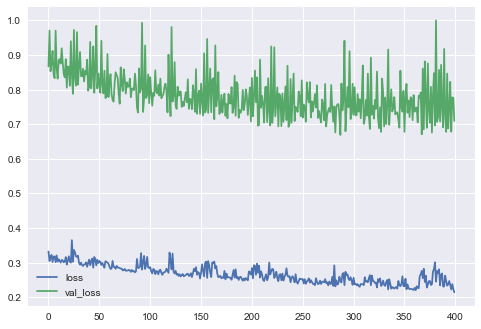

In [40]:
losses[['loss','val_loss']].plot()

<AxesSubplot:>

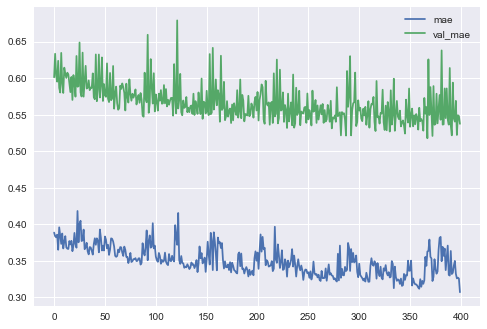

In [41]:
losses[['mae','val_mae']].plot()

In [42]:
predictions=model.predict(X_test)

3/3 [==============================] - 0s 1ms/step


In [43]:
predictions

array([[ 0.28399074],
       [10.686351  ],
       [ 4.699566  ],
       [ 0.14547485],
       [ 7.902301  ],
       [ 6.24574   ],
       [ 0.7572363 ],
       [ 0.51645124],
       [ 0.42689574],
       [ 6.5216837 ],
       [11.246936  ],
       [ 0.6642227 ],
       [ 7.742653  ],
       [ 0.43762642],
       [ 5.3252764 ],
       [ 2.9203289 ],
       [ 0.78327966],
       [14.472064  ],
       [ 0.49639076],
       [ 1.4632381 ],
       [ 0.4361538 ],
       [ 8.457081  ],
       [ 4.7787814 ],
       [ 2.724872  ],
       [ 0.50426656],
       [ 3.511232  ],
       [ 4.767219  ],
       [ 2.691371  ],
       [ 1.0057744 ],
       [ 0.88047206],
       [ 0.44451538],
       [ 9.19884   ],
       [ 0.40655974],
       [ 2.1515796 ],
       [ 8.803756  ],
       [ 4.3835163 ],
       [ 5.8588266 ],
       [ 4.9938655 ],
       [ 2.8001099 ],
       [ 5.613885  ],
       [ 3.0031543 ],
       [ 0.79646486],
       [ 4.28713   ],
       [ 0.37565434],
       [ 6.280121  ],
       [ 0

In [44]:
mean_abs_error=metrics.mean_absolute_error(predictions,y_test)
mean_abs_error

0.5373941729727545

In [45]:
np.sqrt(metrics.mean_squared_error(y_test,predictions))

0.842554088221518

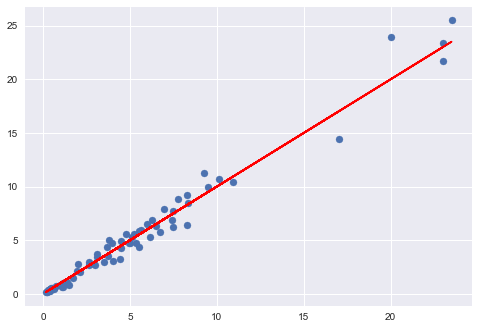

In [46]:
plt.scatter(y_test,predictions)
plt.plot(y_test,y_test,'r')

In [47]:
model.evaluate(X_test,y_test)

3/3 [==============================] - 0s 2ms/step - loss: 0.7099 - mae: 0.5374


[0.7098974585533142, 0.537394106388092]